## Tutorial: how to import the data and visualise them

In [1]:
import numpy as np
import random
#from tree import FamilyTree
from data_handler import ParticleDataset

import matplotlib.pyplot as plt
from matplotlib.patches import Circle,ConnectionPatch

#helper functions for plots
from utils.visualisation import plot_geodesic, get_colors

from jupyterthemes import jtplot
jtplot.style(theme='oceans16')

INFO: Using numpy backend


## The dataset

The dataset is structured as a Pytorch dataset. The two inputs are the path for the data directory and the signal name (this depends on the physics event we are interested in and it is chosen once the data is generated).

The dataset spits each event as dictionary which contains a graphicle object and a hyperbolic coordinates array for each of the algorithm tree (AntiKt, CA and Kt) and for the MC truth.

In [32]:
dataset = ParticleDataset('data/test2', 'signal')
event = dataset[10]

In [3]:
event.keys()

dict_keys(['MC_graph', 'MC_hyp', 'aKt_graph', 'aKt_hyp', 'CA_graph', 'CA_hyp', 'Kt_graph', 'Kt_hyp'])

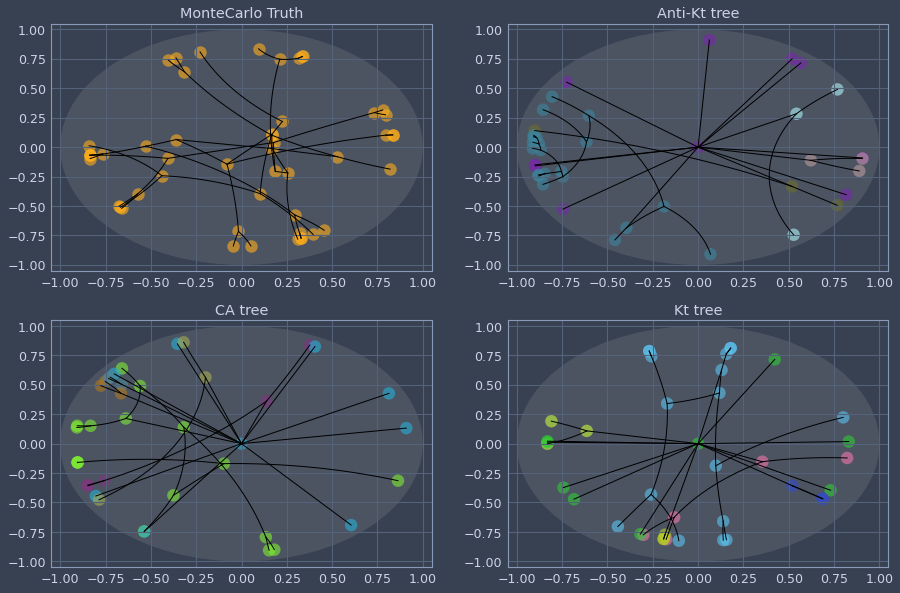

In [4]:
fig,ax = plt.subplots(2,2,figsize=(15,10))
ax = ax.flatten()

keys = [k for k in event.keys()]
titles = [ 'MonteCarlo Truth', 'Anti-Kt tree', 'CA tree', 'Kt tree',]
for k in range(0, 7, 2):
    i = k//2
    graph, hyp = event[keys[k]], event[keys[k+1]]
    
    for edge in graph.edges:
        start = np.where(graph.nodes == edge[0])[0][0]
        end = np.where(graph.nodes == edge[1])[0][0]
        x0,y0 = hyp[start]
        x1,y1 = hyp[end]
        #ax.plot([x0,x1],[y0,y1],alpha=0.1,color='black')
        plot_geodesic(hyp[start],hyp[end],ax[i])
    
    if i ==0:
        ax[i].scatter(hyp[:,0], hyp[:,1], c='orange', s=150, alpha=0.6)
    else:
        colors = get_colors(graph)
        ax[i].scatter(hyp[:,0], hyp[:,1], c=colors, s=150, alpha=0.6)
    
    disk = Circle((0,0),1,color='white',alpha=0.1)#fill=False)
    ax[i].add_patch(disk)
    ax[i].set_xlim(-1.05,1.05)
    ax[i].set_ylim(-1.05,1.05)
    ax[i].set_title(titles[i])

plt.show()
#plt.savefig('example.png')

In [5]:
#import torch
#from manifold.poincare import PoincareBall
#manifold = PoincareBall()

In [6]:
#def distance_matrix(nodes):
#    matrix = torch.zeros(len(nodes),len(nodes))
#    for n_idx in range(len(nodes)):
#        matrix[n_idx] = manifold.sqdist(torch.unsqueeze(nodes[n_idx],0),nodes) + 1e-8
#    #matrix = matrix[torch.triu(torch.ones_like(matrix),diagonal=1) == 1]
#    return matrix.detach().numpy()

In [7]:
#matrix = distance_matrix(torch.tensor(hyp[graph.final]))